In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 

In [43]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

In [44]:
X = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.features) 
y = pd.DataFrame(breast_cancer_wisconsin_diagnostic.data.targets) 
y = y['Diagnosis'].map({'M': 1, 'B': 0}) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [47]:
tModel = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2, random_state=42).fit(X_train, y_train)

In [48]:
tree_rules = export_text(tModel, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_rules)

Decision Tree Structure:
|--- concave_points1 <= 0.05
|   |--- radius3 <= 16.83
|   |   |--- class: 0
|   |--- radius3 >  16.83
|   |   |--- class: 1
|--- concave_points1 >  0.05
|   |--- texture3 <= 20.40
|   |   |--- class: 0
|   |--- texture3 >  20.40
|   |   |--- class: 1



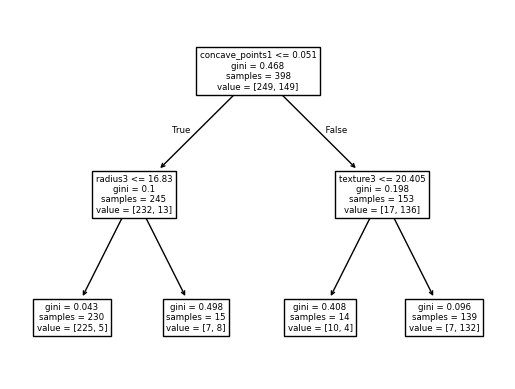

In [49]:
treePlot = plot_tree(tModel, feature_names=list(X.columns), filled=False)

In [50]:
first_split_feature = X.columns[tModel.tree_.feature[0]]
first_split_threshold = tModel.tree_.threshold[0]
print("First split feature: {}".format(first_split_feature))
print("First split threshold: {}".format(first_split_threshold))

First split feature: concave_points1
First split threshold: 0.05127999931573868


In [55]:
def calculate_entropy(y):
    p = y.mean()
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Calculate the information gain
def gain(X, y, feature, threshold):
    parent_entropy = calculate_entropy(y)
    left_indices = X[feature] <= threshold
    right_indices = X[feature] > threshold
    n_left = sum(left_indices)
    n_right = sum(right_indices)
    n_total = n_left + n_right
    left_entropy = calculate_entropy(y[left_indices])
    right_entropy = calculate_entropy(y[right_indices])
    child_entropy = (n_left / n_total) * left_entropy + (n_right / n_total) * right_entropy
    return parent_entropy - child_entropy

In [52]:
information_gain = gain(X_train, y_train, first_split_feature, first_split_threshold)
print("Information Gain: {:.4f}".format(information_gain))

Information Gain: 0.5763


In [53]:
gini = tModel.tree_.impurity[0]
misclassification_error = 1 - tModel.tree_.value[0].max() / tModel.tree_.value[0].sum()
print("Gini: {:.4f}".format)
print("Misclassification Error: {:.4f}".format(misclassification_error))

<built-in method format of str object at 0x0000015049F8DC70>
Misclassification Error: 0.3744


In [54]:
parent_entropy = calculate_entropy(y_train)
print("Parent Node Entropy: {:.4f}".format(parent_entropy))
left_indices = X_train[first_split_feature] <= first_split_threshold
left_entropy = calculate_entropy(y_train[left_indices])
print("Left Child Node Entropy: {:.4f}".format(left_entropy))
right_indices = X_train[first_split_feature] > first_split_threshold
right_entropy = calculate_entropy(y_train[right_indices])
print("Right Child Node Entropy: {:.4f}".format(right_entropy))

Parent Node Entropy: 0.9540
Left Child Node Entropy: 0.2993
Right Child Node Entropy: 0.5033
